# ME314 Homework 2

###Submission instructions

Deliverables that should be included with your submission are shown in **bold** at the end of each problem statement and the corresponding supplemental material. Your homework will be graded IFF you submit a **single** PDF, .mp4 videos of animations when requested and a link to a Google colab file that meet all the requirements outlined below.

- List the names of students you've collaborated with on this homework assignment.
- Include all of your code (and handwritten solutions when applicable) used to complete the problems.
- Highlight your answers (i.e. **bold** and outline the answers) for handwritten or markdown questions and include simplified code outputs (e.g. .simplify()) for python questions.
- Enable Google Colab permission for viewing 
 * Click Share in the upper right corner
 * Under "Get Link" click "Share with..." or "Change" 
 * Then make sure it says "Anyone with Link" and "Editor" under the dropdown menu
- Make sure all cells are run before submitting (i.e. check the permission by running your code in a private mode)
 * Please don't make changes to your file after submitting, so we can grade it!
- Submit a link to your Google Colab file that has been run (before the submission deadline) and don't edit it afterwards!

**NOTE:** This Juputer Notebook file serves as a template for you to start homework. Make sure you first copy this template to your own Google driver (click "File" -> "Save a copy in Drive"), and then start to edit it.

Author: Christopher Luey

Collaborators: Tara Saxena, Mark Chauhan


https://colab.research.google.com/drive/1IcC3a2gn6YoRIDy58e02ZrK3tz2WJNEZ#scrollTo=1sRcT9ipgv1S

In [ ]:
# this code is provided for upgrading sympy to latest version, you don't need to run it
# by yourself, so please leave it commented out
# !pip install --upgrade sympy

# print sympy version for testing, should be 1.6.2
import sympy as sym
import numpy as np
print(sym.__version__)

1.11.1


In [ ]:
##############################################################################################
# If you're using Google Colab, uncomment this section by selecting the whole section and press
# ctrl+'/' on your and keyboard. Run it before you start programming, this will enable the nice 
# LaTeX "display()" function for you. If you're using the local Jupyter environment, leave it alone
##############################################################################################
def custom_latex_printer(exp,**options):
    from google.colab.output._publish import javascript
    url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.1.1/latest.js?config=TeX-AMS_HTML"
    javascript(url=url)
    return sym.printing.latex(exp,**options)
sym.init_printing(use_latex="mathjax",latex_printer=custom_latex_printer)

Below are the help functions in previous homeworks, which you may need for this homework.

In [ ]:
def integrate(f, xt, dt):
    """
    This function takes in an initial condition x(t) and a timestep dt,
    as well as a dynamical system f(x) that outputs a vector of the
    same dimension as x(t). It outputs a vector x(t+dt) at the future
    time step.
    
    Parameters
    ============
    dyn: Python function
        derivate of the system at a given step x(t), 
        it can considered as \dot{x}(t) = func(x(t))
    xt: NumPy array
        current step x(t)
    dt: 
        step size for integration

    Return
    ============
    new_xt: 
        value of x(t+dt) integrated from x(t)
    """
    k1 = dt * f(xt)
    k2 = dt * f(xt+k1/2.)
    k3 = dt * f(xt+k2/2.)
    k4 = dt * f(xt+k3)
    new_xt = xt + (1/6.) * (k1+2.0*k2+2.0*k3+k4)
    return new_xt

def simulate(f, x0, tspan, dt, integrate):
    """
    This function takes in an initial condition x0, a timestep dt,
    a time span tspan consisting of a list [min_time, max_time],
    as well as a dynamical system f(x) that outputs a vector of the
    same dimension as x0. It outputs a full trajectory simulated
    over the time span of dimensions (xvec_size, time_vec_size).
    
    Parameters
    ============
    f: Python function
        derivate of the system at a given step x(t), 
        it can considered as \dot{x}(t) = func(x(t))
    x0: NumPy array
        initial conditions
    tspan: Python list
        tspan = [min_time, max_time], it defines the start and end
        time of simulation
    dt:
        time step for numerical integration
    integrate: Python function
        numerical integration method used in this simulation

    Return
    ============
    x_traj:
        simulated trajectory of x(t) from t=0 to tf
    """
    N = int((max(tspan)-min(tspan))/dt)
    x = np.copy(x0)
    tvec = np.linspace(min(tspan),max(tspan),N)
    xtraj = np.zeros((len(x0),N))
    for i in range(N):
        xtraj[:,i]=integrate(f,x,dt)
        x = np.copy(xtraj[:,i])
    return xtraj 

## Problem 1 (15pts)

In [ ]:
from IPython.core.display import HTML
display(HTML("<table><tr><td><img src='https://github.com/MuchenSun/ME314pngs/raw/master/dyndoublepend.png' width=500' height='350'></table>"))

You're given a double-pendulum system hanging in gravity is shown in the figure above. With $q=[\theta_1, \theta_2]$ as the system configuration variables, use Python's SymPy package to compute the Lagrangian of the system. Note that we assume that the z-axis is pointing out from the screen/paper and thus the positive direction of rotation is counter-clockwise.

> *Hint 1: We recommend that you compute the positions and their time derivatives (velocities) in x-y coordinates! This will involve using some trigonometry to express the $x$ and $y$ coordinates of each mass in terms of $\theta_{1}$ and $\theta_{2}$. Consequently, compute kinetic and potential energy based on that.*
>
> *Hint 2: By convention we will define gravity with positive sign (i.e. $g=9.8$) for numerical evaluation required in the later problems. As such, be careful with the sign of potential energy! You can always go back here after you verify your results by numerical evaluation in Problem 2 and 3.*

---
**Turn in:** Include the code used to symbolically compute Lagrangian and highlight the output of your code which should be the symbolic Lagrangian expression.


In [ ]:
t, m1, m2, r1, r2, g  = sym.symbols(r"t, m1, m2, r1, r2, g")
t1 = sym.Function(r"\theta_1")(t)
t2 = sym.Function(r"\theta_2")(t)

x1 = sym.Function(r"x1")(t)
x2 = sym.Function(r"x2")(t)
y1 = sym.Function(r"y1")(t)
y2 = sym.Function(r"y2")(t)

x1 = r1 * sym.sin(t1)
x2 = r2 * sym.sin(t1 + t2) + x1
y1 = -r1 * sym.cos(t1)
y2 = -r2 * sym.cos(t1 + t2) + y1

KE = (1/2) * m1 * (x1.diff(t) ** 2 + y1.diff(t) ** 2) + (1/2) * m2 * (x2.diff(t) ** 2 + y2.diff(t) **2)

PE = (m1 * g * y1) + (m2 * g * y2)

L = KE - PE

print("\n\033[1mLangrian Expression: ")
display(sym.simplify(L))


Langrian Expression: 


                                                                              
                                                                              
g⋅m₁⋅r₁⋅cos(\theta₁(t)) + g⋅m₂⋅(r₁⋅cos(\theta₁(t)) + r₂⋅cos(\theta₁(t) + \thet
                                                                              

                                     2          ⎛                    2        
                   2 ⎛d             ⎞           ⎜  2 ⎛d             ⎞         
a₂(t))) + 0.5⋅m₁⋅r₁ ⋅⎜──(\theta₁(t))⎟  + 0.5⋅m₂⋅⎜r₁ ⋅⎜──(\theta₁(t))⎟  + 2⋅r₁⋅
                     ⎝dt            ⎠           ⎝    ⎝dt            ⎠         

                                   2                                          
                   ⎛d             ⎞                            d              
r₂⋅cos(\theta₂(t))⋅⎜──(\theta₁(t))⎟  + 2⋅r₁⋅r₂⋅cos(\theta₂(t))⋅──(\theta₁(t))⋅
                   ⎝dt            ⎠                            dt             

                                     2           

## Problem 2 (15pts)

Use Python's SymPy package to compute the Euler-Lagrange equations for the same double-pendulum system in Problem 1 and solve for $\ddot{\theta}_1$ and $\ddot{\theta}_2$.

---
**Turn in:** Include the code used to symbolically compute and solve Euler-Lagrange equations. Also include the output of your code, as in the symbolic expression of Euler-Lagrange equations and their solutions (i.e. $\ddot{\theta}_1$ and $\ddot{\theta}_2$).

In [ ]:
q = sym.Matrix([t1, t2])

L_m = sym.Matrix([L])

ELEQ = sym.Eq(sym.simplify(L_m.jacobian(q)), sym.simplify(L_m.jacobian(q.diff(t)).diff(t)))

print("\n\033[1mEuler Lagrange Equation: ")
display(sym.simplify(ELEQ))

d2dt2q = sym.Matrix([t1.diff(t).diff(t), t2.diff(t).diff(t)])
sol = sym.solve(sym.simplify(ELEQ), d2dt2q, dict=True)
print("\n\033[1mSolutions:")
display(sym.Eq(d2dt2q[0], sym.simplify(sol[0][d2dt2q[0]])))
display(sym.Eq(d2dt2q[1], sym.simplify(sol[0][d2dt2q[1]])))


Euler Lagrange Equation: 


                                                                              
⎡                                                                             
⎢-g⋅(m₁⋅r₁⋅sin(\theta₁(t)) + m₂⋅r₁⋅sin(\theta₁(t)) + m₂⋅r₂⋅sin(\theta₁(t) + \t
⎣                                                                             
                                                                              

                                                                              
                   ⎛                                    ⎛d                d   
heta₂(t)))  -m₂⋅r₂⋅⎜g⋅sin(\theta₁(t) + \theta₂(t)) + r₁⋅⎜──(\theta₁(t)) + ──(\
                   ⎝                                    ⎝dt               dt  
                                                                              

                                               ⎡         2                  ⎛ 
          ⎞                 d             ⎞⎤   ⎢     2  d                   ⎜ 
theta₂(t))⎟⋅sin(\theta₂(t))⋅──(\theta₁(t))⎟⎥ = ⎢m₁


Solutions:


                                                                              
                                                                              
  2               -g⋅m₁⋅sin(\theta₁(t)) + 0.5⋅g⋅m₂⋅sin(\theta₁(t) + 2⋅\theta₂(
 d                                                                            
───(\theta₁(t)) = ────────────────────────────────────────────────────────────
  2                                                                           
dt                                                                            

                                                                             2
                                                             ⎛d             ⎞ 
t)) - 0.5⋅g⋅m₂⋅sin(\theta₁(t)) + 0.5⋅m₂⋅r₁⋅sin(2⋅\theta₂(t))⋅⎜──(\theta₁(t))⎟ 
                                                             ⎝dt            ⎠ 
──────────────────────────────────────────────────────────────────────────────
                                                   

                    ⎛                                                         
                    ⎜                                                         
  2               2⋅⎜0.5⋅g⋅m₁⋅r₁⋅sin(\theta₁(t) - \theta₂(t)) - 0.5⋅g⋅m₁⋅r₁⋅si
 d                  ⎝                                                         
───(\theta₂(t)) = ────────────────────────────────────────────────────────────
  2                                                                           
dt                                                                            

                                                                              
                                                                              
n(\theta₁(t) + \theta₂(t)) + 1.0⋅g⋅m₁⋅r₂⋅sin(\theta₁(t)) + 0.5⋅g⋅m₂⋅r₁⋅sin(\th
                                                                              
──────────────────────────────────────────────────────────────────────────────
                                                   

## Problem 3 (15pts)

Numerically evaluate your solutions for $\ddot{\theta}_1$ and $\ddot{\theta}_2$ from Problem 2 using SymPy's ${\tt lambdify()}$ method, simulate the system for $t\in[0, 5]$ with $m_1=1, m_2=2, R_1=2, R_2=1$ and initial condition as $\theta_1=\theta_2=-\frac{\pi}{2}, \dot{\theta}_1=\dot{\theta}_2=0$. Plot the simulated trajectories of $\theta_1(t)$ and $\theta_2(t)$ versus time.

> *Hint 1: Feel free to use the provided example code or your implementation in Homework 1.*
>
> *Hint 2: By convention, we will define $g=9.8$ as a positive constant. If you got some wierd "flipped" trajectory, go back to Problem 1 and check the sign of your gravity potential energy term.*

---
**Turn in:** Include the code used for numerical evaluation and simulation as well as the output of your code, i.e. values of $\ddot{\theta}_1$, $\ddot{\theta}_2$ at the initial conditions and the plot of $\theta_1(t)$ and $\theta_2(t)$ trajectories versus time. Make sure to label the figure and specify the axis as well as include a legend.


 Solution at Initial Values


  2                  
 d                   
───(\theta₁(t)) = 4.9
  2                  
dt                   

  2                   
 d                    
───(\theta₂(t)) = -4.9
  2                   
dt                    

Where t = 0

 Trajectories


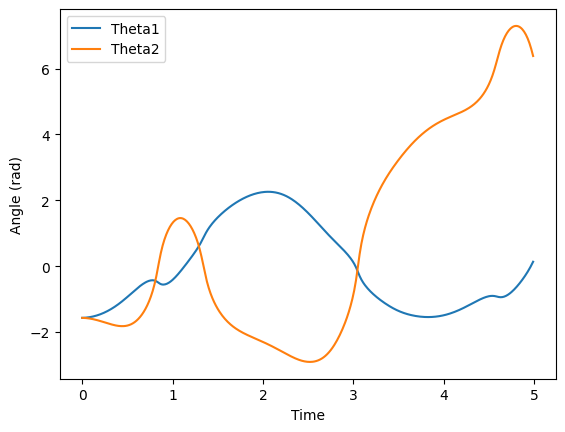

In [ ]:

print("\n\033[1m Solution at Initial Values")
func1 = sym.lambdify((t1, t2, m1, m2, r1, r2, t1.diff(t), t2.diff(t), g), sol[0][d2dt2q[0]])
func2 = sym.lambdify((t1, t2, m1, m2, r1, r2, t1.diff(t), t2.diff(t), g), sol[0][d2dt2q[1]])
display(sym.Eq(d2dt2q[0], func1((-1 * np.pi/2), (-1 * np.pi/2), 1.0, 2.0, 2.0, 1.0, 0.0, 0.0, 9.8)))
display(sym.Eq(d2dt2q[1], func2((-1 * np.pi/2), (-1 * np.pi/2), 1.0, 2.0, 2.0, 1.0, 0.0, 0.0, 9.8)))
print("Where t = 0")

def func(s):
  #[t1, t2, t1diff, t2diff]
  #(t1, t2, m1, m2, r1, r2, t1.diff(t), t2.diff(t), g)
  return np.array([s[2], s[3], func1(s[0], s[1], 1.0, 2.0, 2.0, 1.0, s[2], s[3], 9.8), func2(s[0], s[1], 1.0, 2.0, 2.0, 1.0, s[2], s[3], 9.8)])

import matplotlib.pyplot as plt

x0 = np.array([(-1 * np.pi/2), (-1 * np.pi/2), 0.0, 0.0])
f1 = simulate(func, x0, [0,5], 0.01, integrate)
time = np.arange(0, 5.0, 0.01)

print("\n\033[1m Trajectories")
plt.plot(time, f1[0], label='Theta1')
plt.plot(time, f1[1], label='Theta2')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Angle (rad)')
plt.show()


## Problem 4 (10pts)

Finally, let's get fancy! Use the function provided below to animate your simulation of the double-pendulum system based on the trajectories you got in Problem 3.

> *Hint 1: If your animation seems to be slow, press "pause" and then press "play" again! This should play animation at normal speed.*

---
**Turn in:** Include the code used to generate the animation but note that you don't need to include the animation function! In addition, upload the video of animation through Canvas and make sure that the video format is .mp4. You can use screen capture or record the screen directly with your phone.

In [ ]:
def animate_double_pend(theta_array,L1=1,L2=1,T=10):
    """
    Function to generate web-based animation of double-pendulum system

    Parameters:
    ================================================
    theta_array:
        trajectory of theta1 and theta2, should be a NumPy array with
        shape of (2,N)
    L1:
        length of the first pendulum
    L2:
        length of the second pendulum
    T:
        length/seconds of animation duration

    Returns: None
    """

    ################################
    # Imports required for animation.
    from plotly.offline import init_notebook_mode, iplot
    from IPython.display import display, HTML
    import plotly.graph_objects as go

    #######################
    # Browser configuration.
    def configure_plotly_browser_state():
        import IPython
        display(IPython.core.display.HTML('''
            <script src="/static/components/requirejs/require.js"></script>
            <script>
              requirejs.config({
                paths: {
                  base: '/static/base',
                  plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
                },
              });
            </script>
            '''))
    configure_plotly_browser_state()
    init_notebook_mode(connected=False)

    ###############################################
    # Getting data from pendulum angle trajectories.
    xx1=L1*np.sin(theta_array[0])
    yy1=-L1*np.cos(theta_array[0])
    xx2=xx1+L2*np.sin(theta_array[0]+theta_array[1])
    yy2=yy1-L2*np.cos(theta_array[0]+theta_array[1])
    N = len(theta_array[0]) # Need this for specifying length of simulation

    ####################################
    # Using these to specify axis limits.
    xm=np.min(xx1)-0.5
    xM=np.max(xx1)+0.5
    ym=np.min(yy1)-2.5
    yM=np.max(yy1)+1.5

    ###########################
    # Defining data dictionary.
    # Trajectories are here.
    data=[dict(x=xx1, y=yy1, 
               mode='lines', name='Arm', 
               line=dict(width=2, color='blue')
              ),
          dict(x=xx1, y=yy1, 
               mode='lines', name='Mass 1',
               line=dict(width=2, color='purple')
              ),
          dict(x=xx2, y=yy2, 
               mode='lines', name='Mass 2',
               line=dict(width=2, color='green')
              ),
          dict(x=xx1, y=yy1, 
               mode='markers', name='Pendulum 1 Traj', 
               marker=dict(color="purple", size=2)
              ),
          dict(x=xx2, y=yy2, 
               mode='markers', name='Pendulum 2 Traj', 
               marker=dict(color="green", size=2)
              ),
        ]

    ################################
    # Preparing simulation layout.
    # Title and axis ranges are here.
    layout=dict(xaxis=dict(range=[xm, xM], autorange=False, zeroline=False,dtick=1),
                yaxis=dict(range=[ym, yM], autorange=False, zeroline=False,scaleanchor = "x",dtick=1),
                title='Double Pendulum Simulation', 
                hovermode='closest',
                updatemenus= [{'type': 'buttons',
                               'buttons': [{'label': 'Play','method': 'animate',
                                            'args': [None, {'frame': {'duration': T, 'redraw': False}}]},
                                           {'args': [[None], {'frame': {'duration': T, 'redraw': False}, 'mode': 'immediate',
                                            'transition': {'duration': 0}}],'label': 'Pause','method': 'animate'}
                                          ]
                              }]
               )

    ########################################
    # Defining the frames of the simulation.
    # This is what draws the lines from
    # joint to joint of the pendulum.
    frames=[dict(data=[dict(x=[0,xx1[k],xx2[k]], 
                            y=[0,yy1[k],yy2[k]], 
                            mode='lines',
                            line=dict(color='red', width=3)
                            ),
                       go.Scatter(
                            x=[xx1[k]],
                            y=[yy1[k]],
                            mode="markers",
                            marker=dict(color="blue", size=12)),
                       go.Scatter(
                            x=[xx2[k]],
                            y=[yy2[k]],
                            mode="markers",
                            marker=dict(color="blue", size=12)),
                      ]) for k in range(N)]

    #######################################
    # Putting it all together and plotting.
    figure1=dict(data=data, layout=layout, frames=frames)           
    iplot(figure1)

##################################################################################################

In [ ]:
# Animation code:
x0 = np.array([(-1 * np.pi/2), (-1 * np.pi/2), 0.0, 0.0])
f1 = simulate(func, x0, [0,5], 0.01, integrate)
animate_double_pend(f1,L1=2,L2=1,T=5)

Output hidden; open in https://colab.research.google.com to view.

## Problem 5 (15pts)

In [ ]:
from IPython.core.display import HTML
display(HTML("<table><tr><td><img src='https://github.com/MuchenSun/ME314pngs/raw/master/dynbeadwire.png' width=500' height='350'></table>"))

As shown in the figure above, a bead in gravity is constrained to the path $y=\cos(x)$. With the x-y positions of the bead as the system configuration variables, compute the Lagrangian symbolically using SymPy and write down constraint equation $\phi(q)=0$ of the system as SymPy's symbolic equation.

---
**Turn in:** Include the code you used to compute the Lagrangian and generate the constraint equation as well as the output of your code, i.e. the symbolic expression for the Lagrangian and constraint equation.

In [ ]:
t, m ,g = sym.symbols(r"t, m, g")
x = sym.Function("x")(t)
y = sym.Function("y")(t)

T = (1/2) * m * x.diff(t) ** 2 + (1/2) * m * y.diff(t) ** 2
U = m * g * y

phi = sym.cos(x) - y
L = T - U

print('\n\033[1mLagrangian Expression: ')
display(L)

print('\n\033[1mConstraint Expression (phi): ')
display(phi)

print('\n\033[1mConstraint Equation: ')
display(sym.Eq(phi.diff(t).diff(t), 0))


Lagrangian Expression: 


                            2                   2
                  ⎛d       ⎞          ⎛d       ⎞ 
-g⋅m⋅y(t) + 0.5⋅m⋅⎜──(x(t))⎟  + 0.5⋅m⋅⎜──(y(t))⎟ 
                  ⎝dt      ⎠          ⎝dt      ⎠ 


Constraint Expression (phi): 


-y(t) + cos(x(t))


Constraint Equation: 


              2                             2     2          
             d                    ⎛d       ⎞     d           
- sin(x(t))⋅───(x(t)) - cos(x(t))⋅⎜──(x(t))⎟  - ───(y(t)) = 0
              2                   ⎝dt      ⎠      2          
            dt                                  dt           

## Problem 6 (10pts)

Use Python's SymPy's package to solve for the equations of motion ($\ddot{x}$ and $\ddot{y}$) and constraint force $\lambda$ for the constrained bead system in Problem 5.

---
**Turn in:** Include the code used to symbolically solve for the equations of motion and constraint force as well as the output of the code, i.e. the symbolic EOM equations and constraint force.

In [ ]:
e = sym.symbols(r"lambda")
d2dt2q = sym.Matrix([x.diff(t).diff(t), y.diff(t).diff(t), e])
q = sym.Matrix([x, y])
L_m = sym.Matrix([L])
ELEQ = sym.Eq(L_m.jacobian(q) - L_m.jacobian(q.diff(t)).diff(t), e*sym.Matrix([phi]).jacobian(q))
sol = sym.solve([sym.simplify(ELEQ), sym.Eq(phi.diff(t).diff(t), 0)], d2dt2q, dict=False)
print("\n\033[1mSymbolic Solutions: ")
display(sym.Eq(e, sol[e]))
display(sym.Eq(x.diff(t).diff(t), sol[x.diff(t).diff(t)]))
display(sym.Eq(y.diff(t).diff(t), sol[y.diff(t).diff(t)]))
funcx = sym.lambdify((g, x, m, x.diff(t)), sol[x.diff(t).diff(t)])
funcy = sym.lambdify((g, x, m, x.diff(t)), sol[y.diff(t).diff(t)])
funce = sym.lambdify((g, x, m, x.diff(t)), sol[e])


Symbolic Solutions: 


                                             2
                                   ⎛d       ⎞ 
                       m⋅cos(x(t))⋅⎜──(x(t))⎟ 
          g⋅m                      ⎝dt      ⎠ 
λ = ──────────────── - ───────────────────────
       2                      2               
    sin (x(t)) + 1.0       sin (x(t)) + 1.0   

                                                             2
                                                   ⎛d       ⎞ 
  2                            sin(x(t))⋅cos(x(t))⋅⎜──(x(t))⎟ 
 d            g⋅sin(x(t))                          ⎝dt      ⎠ 
───(x(t)) = ──────────────── - ───────────────────────────────
  2            2                          2                   
dt          sin (x(t)) + 1.0           sin (x(t)) + 1.0       

                                                     2
                                           ⎛d       ⎞ 
  2                  2           cos(x(t))⋅⎜──(x(t))⎟ 
 d              g⋅sin (x(t))               ⎝dt      ⎠ 
───(y(t)) = - ──────────────── - ─────────────────────
  2              2                     2              
dt            sin (x(t)) + 1.0      sin (x(t)) + 1.0  

## Problem 7 (20pts)

Simulate this constrained bead system with $m=1$ and initial condition as $x=0.1, y=\cos(0.1), \dot{x}=\dot{y}=0$, for $t\in[0, 10]$. Animate your simulated trajectory using the provided function below.

---
**Turn in:** Include the code used to generate the animation but note that you don't need to include the animation function! In addition, upload the video of animation through Canvas and make sure that the video format is .mp4. You can use screen capture or record the screen directly with your phone.

In [ ]:
def animate_bead(xy_array,T=10):
    """
    Function to generate web-based animation of constrained bead system
    
    Parameters:
    ================================================
    xy_array:
        trajectory of x and y, should be a NumPy array with
        shape of (2,N)
    T:
        length/seconds of animation duration
    
    Returns: None
    """
    
    ################################
    # Imports required for animation.
    from plotly.offline import init_notebook_mode, iplot
    from IPython.display import display, HTML
    import plotly.graph_objects as go
    
    #######################
    # Browser configuration.
    def configure_plotly_browser_state():
        import IPython
        display(IPython.core.display.HTML('''
            <script src="/static/components/requirejs/require.js"></script>
            <script>
              requirejs.config({
                paths: {
                  base: '/static/base',
                  plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
                },
              });
            </script>
            '''))
    configure_plotly_browser_state()
    init_notebook_mode(connected=False)
    
    ###############################################
    # Getting data from trajectories.
    N = len(xy_array[0]) # Need this for specifying length of simulation
    
    ####################################
    # Using these to specify axis limits.
    xm=np.min(xy_array[0])-0.5
    xM=np.max(xy_array[0])+0.5
    ym=np.min(xy_array[1])-0.5
    yM=np.max(xy_array[1])+0.5

    ###########################
    # Defining data dictionary.
    # Trajectories are here.
    data=[dict(x=xy_array[0], y=xy_array[1], 
               mode='markers', name='bead', 
               marker=dict(color="blue", size=10)
              ),
          dict(x=xy_array[0], y=xy_array[1], 
               mode='lines', name='trajectory',
               line=dict(width=2, color='red')
              ),
        ]
    
    ################################
    # Preparing simulation layout.
    # Title and axis ranges are here.
    layout=dict(xaxis=dict(range=[xm, xM], autorange=False, zeroline=False,dtick=1),
                yaxis=dict(range=[ym, yM], autorange=False, zeroline=False,scaleanchor = "x",dtick=1),
                title='Constrained Bead Simulation', 
                hovermode='closest',
                updatemenus= [{'type': 'buttons',
                               'buttons': [{'label': 'Play','method': 'animate',
                                            'args': [None, {'frame': {'duration': T, 'redraw': False}}]},
                                           {'args': [[None], {'frame': {'duration': T, 'redraw': False}, 'mode': 'immediate',
                                            'transition': {'duration': 0}}],'label': 'Pause','method': 'animate'}
                                          ]
                              }]
               )
    
    ########################################
    # Defining the frames of the simulation.
    # This is what draws the bead at each time
    # step of simulation.
    frames=[dict(data=[go.Scatter(
                            x=[xy_array[0][k]],
                            y=[xy_array[1][k]],
                            mode="markers",
                            marker=dict(color="blue", size=10))
                      ]) for k in range(N)]
    
    
    
    #######################################
    # Putting it all together and plotting.
    figure1=dict(data=data, layout=layout, frames=frames)           
    iplot(figure1)

In [ ]:
def f(s):
  #(g, x, m, x.diff(t)
  #[x, y, xdot, ydot]
  return np.array([s[2], s[3], funcx(9.8, s[0], 1, s[2]), funcy(9.8, s[0], 1, s[2])])

x0 = np.array([0.1, np.cos(0.1), 0,0])
sim_traj = simulate(f, x0, [0, 10], 0.01, integrate)
print('Shape of trajectory: ', sim_traj.shape)

animate_bead(sim_traj,T=10)

Output hidden; open in https://colab.research.google.com to view.